## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [12]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [13]:
df_train = pd.read_csv("C:/Users/Administrator/Desktop/Python資料科學程式馬拉松/5.專案/Titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


In [22]:
print(df_train['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [23]:
# Z-score method
import numpy as np

def out_z_score(data,times):
    mean_d = np.mean(data)
    std_d = np.std(data)
    z_score = [(x - mean_d) / std_d for x in data]
    return np.where(np.abs(z_score) > times)

# 3倍標準差原則計算，檢視['Fare']哪些是異常值
out_index = out_z_score(df_train['Fare'],3) 
# print(out_index)
print(out_index[0])
print('進行3倍標準差原則的計算找出的異常值')
print(df_train.loc[out_index[0],'Fare'])

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]
進行3倍標準差原則的計算找出的異常值
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


## 方法3-盒鬚圖判別法(IQR method)

In [24]:
def out_box(data,times):
    q_1,q_3 = np.nanpercentile(data,[25,75])
    iqr = q_3 - q_1
    lower_bound = q_1 - (iqr * times)
    upper_bound = q_3 + (iqr * times)
    return np.where((data > upper_bound) | (data < lower_bound))

# 1.5倍 IOR
out_index1 = out_box(df_train['Fare'],1.5)
print(out_index1)
print('盒鬚圖判別法找出的異常值')
print(df_train.loc[out_index1[0],'Fare'])

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
       258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
       311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
       375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
       496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
       585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
       689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
       779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype=int64),)
盒鬚圖判別法找出的異常值
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


In [25]:
# 2倍 IOR
out_index2 = out_box(df_train['Fare'],2)
print(out_index2)
print('盒鬚圖判別法找出的異常值')
print(df_train.loc[out_index2[0],'Fare'])

(array([ 27,  31,  34,  61,  62,  88, 102, 118, 124, 139, 195, 215, 224,
       230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299,
       305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 337, 341, 373,
       375, 377, 380, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496,
       498, 504, 505, 520, 527, 537, 544, 550, 557, 558, 581, 585, 587,
       591, 609, 627, 659, 660, 679, 689, 698, 700, 708, 716, 730, 737,
       741, 742, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856,
       879], dtype=int64),)
盒鬚圖判別法找出的異常值
27     263.0000
31     146.5208
34      82.1708
61      80.0000
62      83.4750
         ...   
829     80.0000
835     83.1583
849     89.1042
856    164.8667
879     83.1583
Name: Fare, Length: 92, dtype: float64


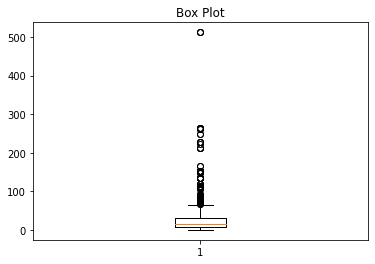

In [27]:
# 使用np.isnana(data)，找出在 age中的遺失值，然後逐位反轉，讓遺失值為 0,則可以透過索引的方式，濾掉遺失值。
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=1.5)    #作圖
plt.title('Box Plot')
plt.show()

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


大多數的資料票價都在接近0的位置，有可能是資料遺失，資料的準確性可能不高，離群值不應該是異常。